# Introduction to Machine Learning

## Outline

1. About the dataset: Boston Housing Dataset
2. Exploratory Data Analysis
3. Training the model
4. Evaluate the model


## 1. About the Dataset: Boston Housing (Regression)

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of [ Boston MA](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

In [1]:
import numpy as np
import pandas as pd
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 2. Exploratory Data Analysis

### 2.1 Basic Statistics

In [2]:
len(data)

506

In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 2.2 Checking for Outliers

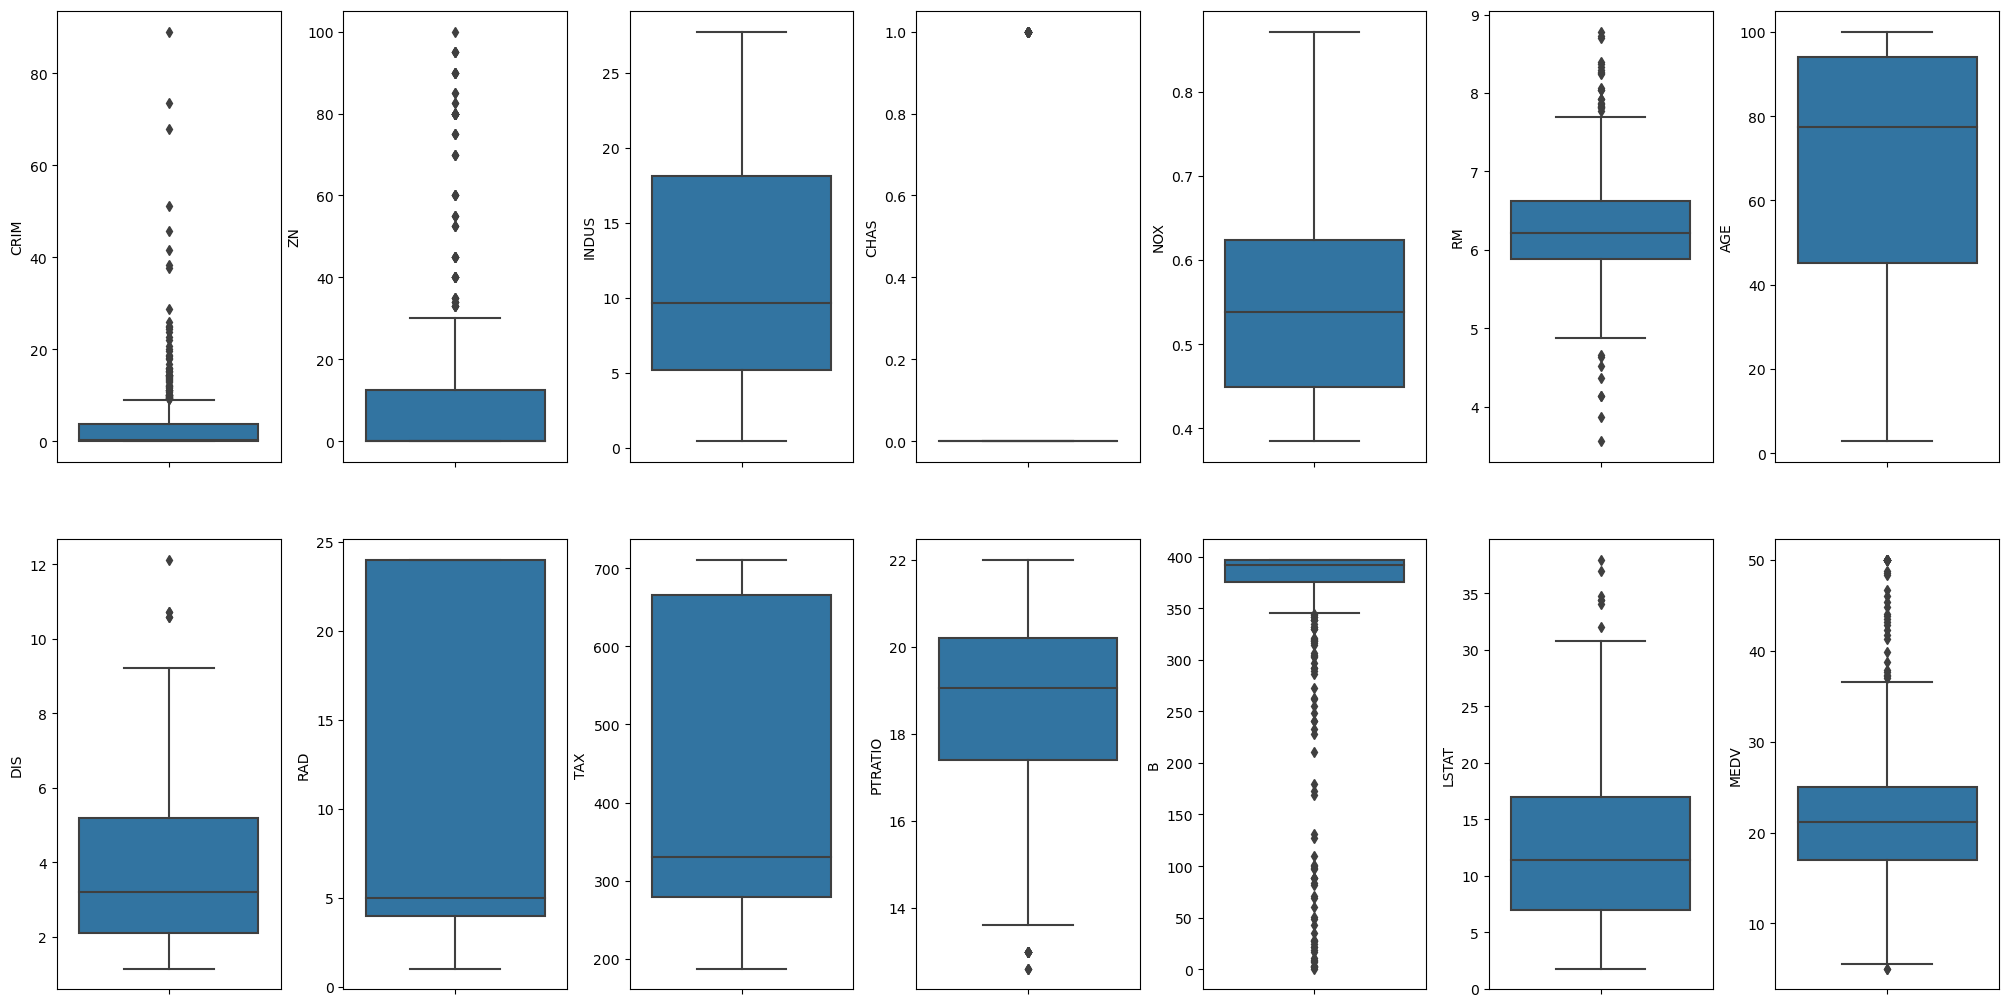

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [5]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


### 2.3 Pairwise Correlation

<Axes: >

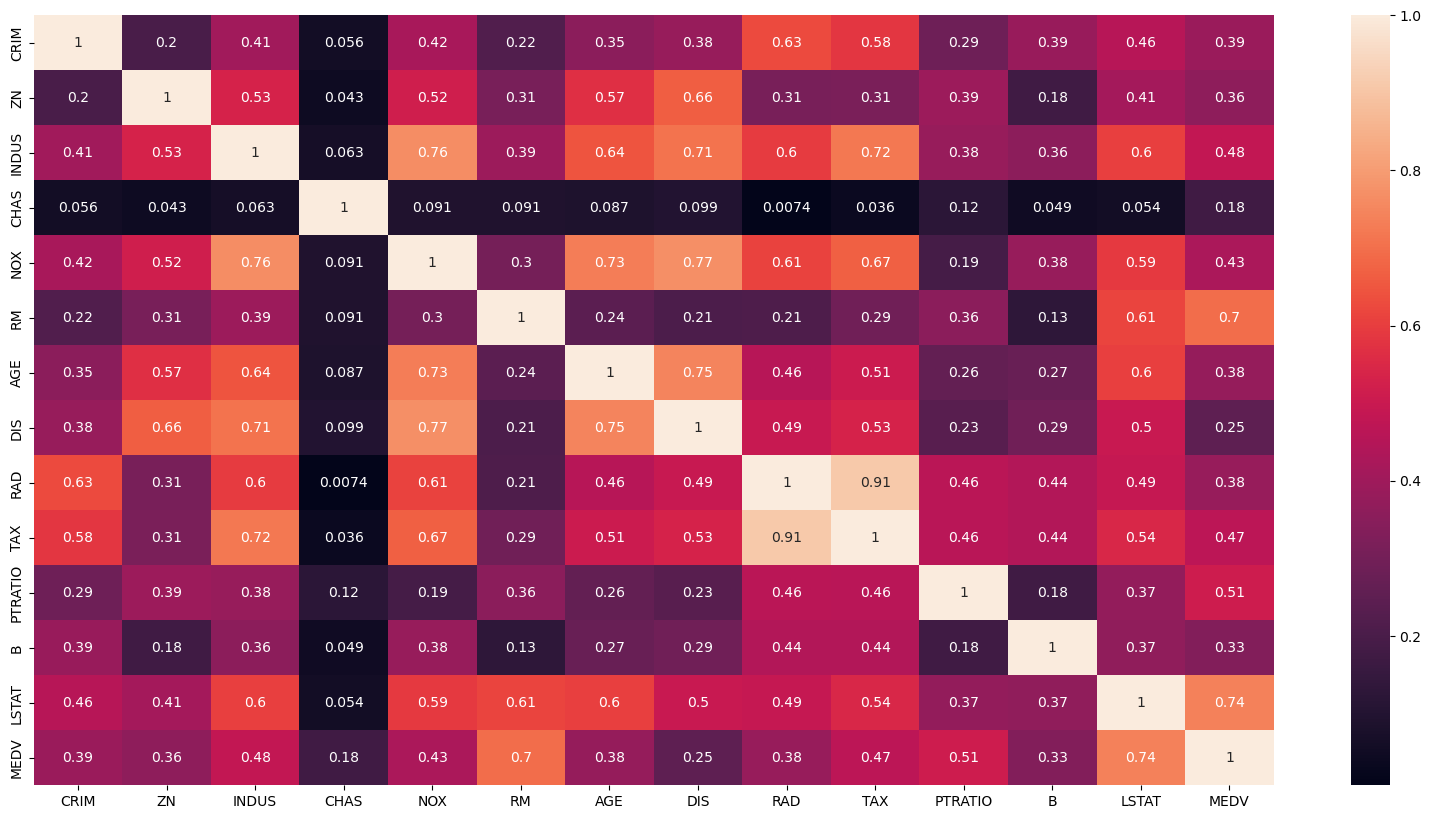

In [6]:
# Pairwise Correlation
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

## 3. Training the Model

In [7]:
# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree

### 3.1 Data Preprocessing

In [8]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
X = data.loc[:,column_sels] #Independent Variables
y = data['MEDV'] #Dependent Variable, Target Variable

In [9]:
# We are going to keep 20% of the dataset in test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

In [10]:
print("X_train: ",X_train.shape, "X_test: ",X_test.shape, "y_train: ",y_train.shape, "y_test: ",y_test.shape)

X_train:  (404, 8) X_test:  (102, 8) y_train:  (404,) y_test:  (102,)


## 4 Evaluate the model

### 4.1 Using The Gradient Boosting Regressor

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error #Regression Performance Metrics

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

scalar = StandardScaler().fit(X_train)

gbr = GradientBoostingRegressor(random_state=21, n_estimators=10000)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_train)
dataset = pd.DataFrame(np.transpose(np.array([y_pred, y_train.values])), columns = ["y_pred", "y_train"])
print("R2: ", r2_score(y_train, y_pred)) #R-squared
print("MAE: ", mean_absolute_error(y_train, y_pred)) #Mean absolute error
print("MSE: ", mean_squared_error(y_train, y_pred)) #Mean squared error
dataset

R2:  1.0
MAE:  1.1697217959914975e-08
MSE:  2.2203344351721588e-16


,y_pred,y_train
0,26.7,26.7
1,21.7,21.7
2,22.0,22.0
3,22.9,22.9
4,10.4,10.4
...,...,...
399,18.5,18.5
400,36.4,36.4
401,19.2,19.2
402,16.6,16.6


<Axes: xlabel='y_train', ylabel='y_pred'>

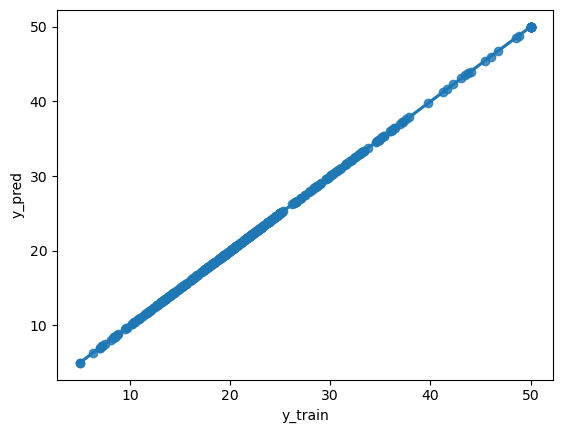

In [21]:
sns.regplot(x="y_train", y="y_pred", data=dataset)